In [8]:
from torchvision.datasets import MNIST

In [9]:
# 임의데이터
import torchvision.transforms as transforms

# Normalize data with mean=0.5, std=1.0
mnist_transform = transforms.Compose([
    transforms.ToTensor() 
    # transforms.Normalize((0.5,), (1.0,))
])
root_dir = './mnist_root'
train_dataset = MNIST(root_dir,transform= mnist_transform, train=True, download=True)

In [10]:
import torch
import torch.nn as nn

In [11]:
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [12]:
import pandas as pd

In [13]:
class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())            
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)            

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
    
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        

In [14]:
# D = Discriminator()
# from tqdm import tqdm
# for img,target in tqdm(train_dataset):
#     # real data
#     img = img.view(28*28)
#     D.train(img, torch.FloatTensor([1.0]))
#     # fake data
#     D.train(generate_random_image(784), torch.FloatTensor([0.0]))    

In [15]:
class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())            

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))       

In [16]:
D = Discriminator()
G = Generator()

epochs = 4
from tqdm import tqdm
for epoch in range(epochs):
  print ("epoch = ", epoch + 1)

  # train Discriminator and Generator

  for img,target in tqdm(train_dataset):
    # train discriminator on true
    img = img.view(28*28)
    D.train(img, torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))


epoch =  1


  8%|▊         | 5027/60000 [00:32<05:59, 152.71it/s]

counter =  10000


 17%|█▋        | 10023/60000 [01:08<05:24, 154.09it/s]

counter =  20000


 25%|██▌       | 15018/60000 [01:40<04:42, 159.47it/s]

counter =  30000


 33%|███▎      | 20018/60000 [02:13<04:15, 156.56it/s]

counter =  40000


 42%|████▏     | 25017/60000 [02:47<03:55, 148.55it/s]

counter =  50000


 50%|█████     | 30028/60000 [03:20<03:11, 156.71it/s]

counter =  60000


 58%|█████▊    | 35016/60000 [03:52<02:42, 153.72it/s]

counter =  70000


 67%|██████▋   | 40027/60000 [04:25<02:09, 154.79it/s]

counter =  80000


 75%|███████▌  | 45016/60000 [04:58<01:36, 154.51it/s]

counter =  90000


 83%|████████▎ | 50028/60000 [05:31<01:06, 150.65it/s]

counter =  100000


 92%|█████████▏| 55017/60000 [06:04<00:32, 152.58it/s]

counter =  110000


100%|██████████| 60000/60000 [06:37<00:00, 150.97it/s]


counter =  120000
epoch =  2


  8%|▊         | 5015/60000 [00:34<05:50, 156.86it/s]

counter =  130000


 17%|█▋        | 10024/60000 [01:07<05:28, 152.28it/s]

counter =  140000


 25%|██▌       | 15016/60000 [01:39<04:49, 155.41it/s]

counter =  150000


 33%|███▎      | 20021/60000 [02:12<04:19, 154.07it/s]

counter =  160000


 42%|████▏     | 25018/60000 [02:45<03:48, 152.78it/s]

counter =  170000


 50%|█████     | 30021/60000 [03:18<03:14, 153.80it/s]

counter =  180000


 58%|█████▊    | 35023/60000 [03:50<02:42, 153.71it/s]

counter =  190000


 67%|██████▋   | 40024/60000 [04:23<02:08, 156.04it/s]

counter =  200000


 75%|███████▌  | 45025/60000 [04:57<01:40, 148.91it/s]

counter =  210000


 83%|████████▎ | 50029/60000 [05:30<01:05, 151.17it/s]

counter =  220000


 92%|█████████▏| 55018/60000 [06:03<00:33, 147.97it/s]

counter =  230000


100%|██████████| 60000/60000 [06:36<00:00, 151.46it/s]


counter =  240000
epoch =  3


  8%|▊         | 5022/60000 [00:33<06:06, 149.83it/s]

counter =  250000


 17%|█▋        | 10018/60000 [01:05<05:29, 151.60it/s]

counter =  260000


 25%|██▌       | 15029/60000 [01:38<05:06, 146.83it/s]

counter =  270000


 33%|███▎      | 20019/60000 [02:11<04:20, 153.59it/s]

counter =  280000


 42%|████▏     | 25025/60000 [02:44<03:43, 156.81it/s]

counter =  290000


 50%|█████     | 30018/60000 [03:18<03:24, 146.54it/s]

counter =  300000


 58%|█████▊    | 35015/60000 [03:51<02:42, 153.44it/s]

counter =  310000


 67%|██████▋   | 40025/60000 [04:24<02:15, 147.05it/s]

counter =  320000


 75%|███████▌  | 45026/60000 [04:57<01:43, 144.70it/s]

counter =  330000


 83%|████████▎ | 50022/60000 [05:30<01:09, 143.98it/s]

counter =  340000


 92%|█████████▏| 55018/60000 [06:02<00:32, 151.81it/s]

counter =  350000


100%|██████████| 60000/60000 [06:35<00:00, 151.65it/s]


counter =  360000
epoch =  4


  8%|▊         | 5030/60000 [00:33<05:53, 155.58it/s]

counter =  370000


 17%|█▋        | 10016/60000 [01:07<05:23, 154.69it/s]

counter =  380000


 25%|██▌       | 15016/60000 [01:40<04:57, 151.19it/s]

counter =  390000


 33%|███▎      | 20022/60000 [02:13<04:22, 152.46it/s]

counter =  400000


 42%|████▏     | 25025/60000 [02:45<03:42, 157.07it/s]

counter =  410000


 50%|█████     | 30028/60000 [03:18<03:15, 152.99it/s]

counter =  420000


 58%|█████▊    | 35022/60000 [03:51<02:40, 155.40it/s]

counter =  430000


 67%|██████▋   | 40017/60000 [04:24<02:08, 155.01it/s]

counter =  440000


 75%|███████▌  | 45022/60000 [04:56<01:34, 159.13it/s]

counter =  450000


 83%|████████▎ | 50029/60000 [05:31<01:07, 147.29it/s]

counter =  460000


 92%|█████████▏| 55030/60000 [06:04<00:32, 150.86it/s]

counter =  470000


100%|██████████| 60000/60000 [06:36<00:00, 151.27it/s]

counter =  480000


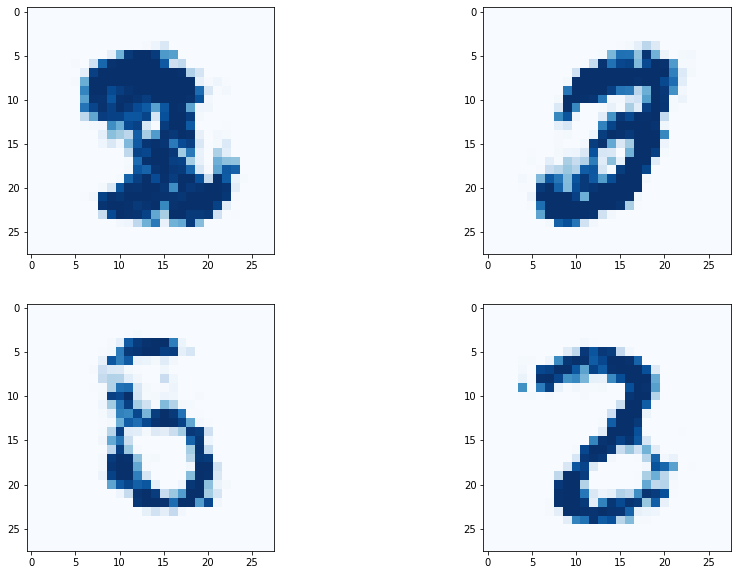

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  output = G.forward(generate_random_seed(100))
  img = output.detach().numpy().reshape(28,28)
  plt.imshow(img, interpolation='none', cmap='Blues')

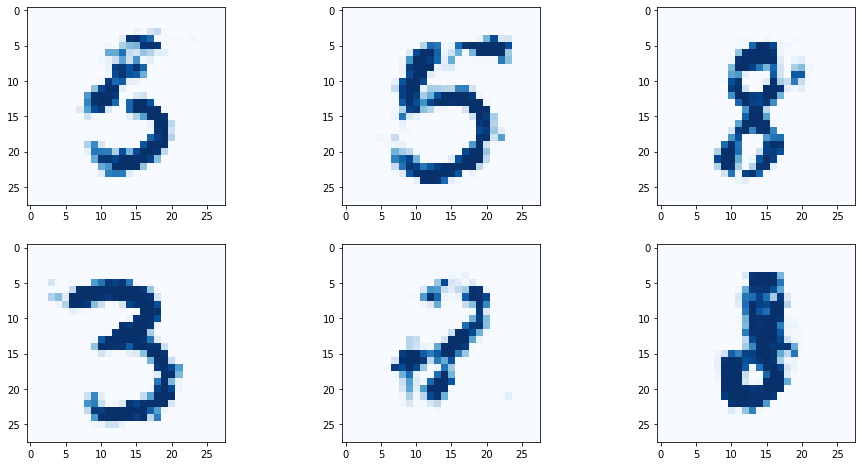

In [18]:
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

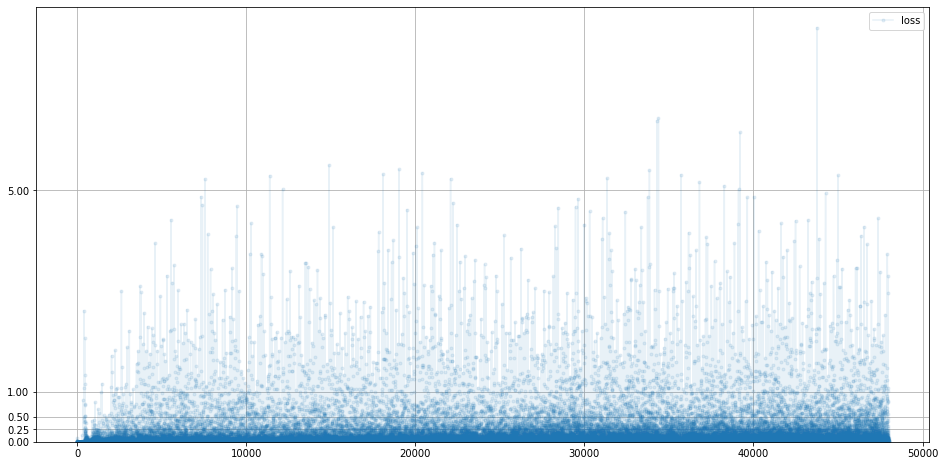

In [19]:
D.plot_progress()